<img src="./images/DC_Gray _Logo.png">

# Hypothesis Testing on Beer Data
What better place to explore statistics than with beer!

This notebook explores different facets of beer including brewing location, bitterness, and alcohol content. We use this data to generate and test hypotheses.

## BreweryDB Data
### Loading the dataset
The data for this first test was pulled from [BreweryDB](https://www.brewerydb.com/developers/apps) by API. The data was saved as a CSV.

In [1]:
# Data analysis packages:
import pandas as pd
import numpy as np

# Visualization packages:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

# autoreload 
%load_ext autoreload
%autoreload 2

## Loading the dataset
beers = pd.read_csv('data/dirty_data.csv', index_col=0)

### Understanding the data

In order to define hypotheses, we first need to know what information is available in the dataset.

In [2]:
## Print the number of rows and columns in the dataset:
print('This dataset has {0} rows'.format(len(beers)), 'and {} columns.'.format(len(beers.columns)-1))

## Show first five rows:
beers.head()

This dataset has 508400 rows and 19 columns.


,id,name,name_display,abv,gravity,ibu,organic,retired,style_name,created,updated,ibu_min,ibu_max,abv_min,abv_max,srm_min,srm_max,fg_min,fg_max,og_min
0,c4f2KE,'Murican Pilsner,'Murican Pilsner,5.5,NaN,NaN,N,N,American-Style Pilsener,2013-08-19 11:58:12,2018-11-02 02:15:14,25.0,40.0,5.0,6.0,3.0,6.0,1.012,1.018,1.045
1,zTTWa2,11.5° PLATO,11.5° PLATO,4.5,1.046,35.0,N,N,Session India Pale Ale,2016-08-09 14:44:42,2018-11-02 02:15:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zfP2fK,12th Of Never,12th Of Never,5.5,1.050,45.0,N,N,American-Style Pale Ale,2016-08-03 23:25:54,2018-11-02 02:15:14,30.0,42.0,4.5,5.6,6.0,14.0,1.008,1.014,1.044
3,xwYSL2,15th Anniversary Ale,15th Anniversary Ale,NaN,NaN,NaN,N,N,Extra Special Bitter,2015-04-16 15:44:15,2018-11-02 02:15:14,30.0,45.0,4.8,5.8,8.0,14.0,1.010,1.016,1.046
4,UJGpVS,16 So Fine Red Wheat Wine,16 So Fine Red Wheat Wine,11.0,NaN,NaN,N,N,American-Style Wheat Wine Ale,2013-02-24 16:31:05,2018-11-02 02:15:14,45.0,85.0,8.4,12.0,8.0,15.0,1.024,1.032,1.088


Looking at the histogram of ABV values below, we see that there is not a continuous distribution but rather that the items occur in buckets at certain intervals.

In [3]:
#Display histogram showing frequency of ABV values; we expect a shape that approximates a curve
# sns.distplot((beers.abv.dropna()),hist=True,kde=False,);

When we investigate this further, we see that the dataset is actually filled with dummy data that is copied many times over.

In [4]:
#See how many times names of beers appear in the dataset
print(beers.name.value_counts().head())

Alpha Dog Imperial IPA                 10168
420 Extra Pale Ale                     10168
Ale 20                                 10168
30th Anniversary - Jack & Ken's Ale    10168
3 Weight                               10168
Name: name, dtype: int64


In [5]:
#Count how many unique beers are in the dataset of ~500,000 values
len(beers.name.unique())

50

It is clear that this is not a dataset that would lead to valuable insights.

## New Beer Dataset
We chose a new dataset that also pertained to beer. It was originally in two separate files, which we joined on an ID value. We then exported that new, merged set as a CSV. We load it below.

### Loading the Dataset and Understanding the Data

We see that this set contains information on alcohol by volume (ABV), international bitterness units (IBU), beer name, beer style, brewery name, and brewery location. We can use different combinations of these values to suggest different hypotheses.

In [6]:
brewery = pd.read_csv('data/beer_and_brewery.csv', index_col=0)
brewery.head()

,beer_id,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


## Hypothesis 1: ABV/IBU of beers brewed in Colorado and beers brewed in California
In this test, we compare beers brewed in two states to see if there is a significant difference between their ABVs.

According to [TheDenverChannel](https://www.thedenverchannel.com/money/consumer/colorado-grocers-can-offer-full-strength-beer-on-jan-1), prior to 2019, beer sold at Colorado grocery and convenience stores ws limited to 3.2% alcohol by weight, or 4% ABV. To find beer with higher alcohol content — typically known as full-strength beer — you had to shop at liquor stores.

You can view other laws by state [here](https://www.legalbeer.com/liquor-laws-by-state).

In [7]:
# Hypothesis question: what is the difference in ABV between CO and CA
CO_brewery = brewery[brewery.state == 'CO']['abv']
CA_brewery = brewery[brewery.state == 'CA']['abv']
CO_brewery = CO_brewery[~np.isnan(CO_brewery)]
CA_brewery = CA_brewery[~np.isnan(CA_brewery)]
print('Sample mean in Alcohol by Volume (ABV) in Colorado: ', round(CO_brewery.mean(), 3))
print('Sample variance in Alcohol by Volume (ABV) in Colorado: ', round(CO_brewery.var(), 5))
print('Sample size:', len(CO_brewery))
print("---------------------------------")
print('Sample mean Alcohol by Volume (ABV) in California: ', round(CA_brewery.mean(), 3))
print('Sample variance Alcohol by Volume (ABV) in California:', round(CA_brewery.var(), 5))
print('Sample size:', len(CA_brewery))

Sample mean in Alcohol by Volume (ABV) in Colorado:  0.063
Sample variance in Alcohol by Volume (ABV) in Colorado:  0.00021
Sample size: 250
---------------------------------
Sample mean Alcohol by Volume (ABV) in California:  0.061
Sample variance Alcohol by Volume (ABV) in California: 0.00023
Sample size: 182


### 1.1. Set Null Hypotheses
The null hypothesis is there is no difference in Alcohol By Volume between beers brewed in Colorado and beers brewed in California.

>**$H_{0}$: The mean ABV difference between Colorado and California beers is zero. <br> 
i.e. $H_{0} = H_{1}$**

### 1.2. Set Alternative Hypothesis

>**$H_{1}$ (2-tailed): The mean ABV difference between Colorado and California beers is different.**

### 1.3. Choose the Significance Level
The significance level ($\alpha$) is the probability of rejecting the null hypothesis when it is actually true. The general significance level of 0.05 or 5% risk is used for this hypothesis test.

### 1.4. Choose A Test
The Central Limit Theory states that as the number of samples increases, the distribution of sample means follows a normal distribution.

This allows us to perform a two-sample t-test.



### 1.5. Calculate Test Statistic
We know that the variance is equal in these samples.
we can calculate the two-sample t-statistic like so:

$$\large t = \frac{\bar{x}_{1} - \bar{x}_{2}}{\sqrt{s^{2}_{p} (\frac{1}{n_{1}} + \frac{1}{n_{2}}) }    }  $$

Where $s^{2}_{p}$ is the pooled sample variance, calculated as:

$$\large s^{2}_{p}  = \frac{(n_{1} -1)s^{2}_{1} +  (n_{2} -1)s^{2}_{2}}{n_{1} + n_{2} - 2}  $$

Where $s^{2}_{1}$ and $s^{2}_{2}$ are the variances for each sample given by the formula 
$$ \large s^{2} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}{n-1} $$

Here we import a function called twosample_tstatistic() that was written for this project. It accepts two variables as arguments and computes the t-statisic, the critical t-value, and the p-value. It uses .05 as a default value for alpha but it can be changed by entering a new alpha value.

In [8]:
#Use our generated t-statistic function to calculate t-statistic, critical values, and p-value
import test_modules  as test
t_stat = test.twosample_tstatistic(CO_brewery, CA_brewery)

Null hypothesis is True with: 
 t-statistic = 1.5843 
 critical t-value = 1.9655 and 
 p-value =  0.1139 

>> We fail to reject the Null Hypothesis 

----- Groups info  -----
The groups contain 250 , and 182 observations. 
    The means are 0.0634, and 0.0611 respectivelly


In [9]:
# comparing with scipy built in libarary
import scipy.stats as stats
stats.ttest_ind(CO_brewery, CA_brewery)

Ttest_indResult(statistic=1.584344798394857, pvalue=0.11385041283398745)

### 1.6. Interpret the Result

Graphing the result is a useful way to visualize and interperet the output. Here we use a function called visualize_t(), written for this project.

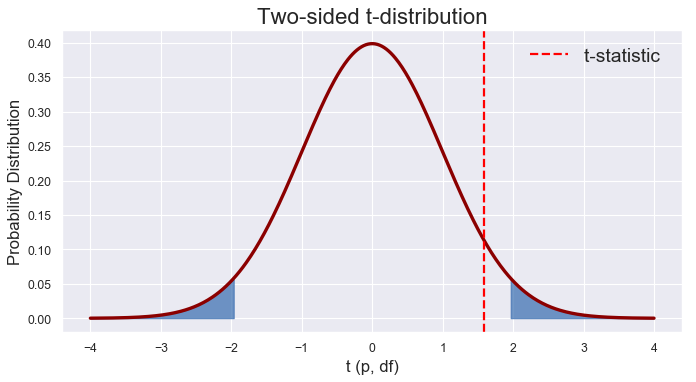

In [10]:
#Use our generated visualization function to create a visualization of the experiment
import visualization
import numpy as np
visualization.visualize_t(t_stat, len(CO_brewery), len(CA_brewery));

## Welch's t-test
Welch's t-test is most common hypothesis test used in a two-sample test to infer the two populations have equal means. Welch's t-test is more reliable when the two samples have unequal variances and/or unequal sample sizes.

Here we use the test to examine IBU of the same subsets of beers-- those brewed in Colorado and California.

In [11]:
brewery.shape

(2410, 11)

In [12]:
# removing nans
brewery_cleand  = brewery[~np.isnan(brewery.ibu)] # ibu was ranged from 4 to 138. we are only intersted to see 

# IBU was in range of 4 to 138. we are only intersted to see values from 15 to 120  
brewery_cleand = brewery_cleand[brewery_cleand.ibu > 15] 
brewery_cleand = brewery_cleand[brewery_cleand.ibu < 120]

# check box plot 
brewery_cleand.shape

(1248, 11)

In [13]:
#Display data about the IBU of beers in CO and CA
CO_ibu = brewery[brewery.state == 'CO']['ibu']
CA_ibu = brewery[brewery.state == 'CA']['ibu']
CO_ibu = CO_ibu[~np.isnan(CO_ibu)]
CA_ibu = CA_ibu[~np.isnan(CA_ibu)]
print('\n', "------  Colorado (CO)  ------")
print('Sample IBU mean:', round(CO_ibu.mean(), 3))
print('Sample IBU variance: ', round(CO_ibu.var(), 5))
print('Sample size is: ', CO_ibu.size)
print('\n', "------  California (CA) ------")
print('Sample IBU mean: ', round(CA_ibu.mean(), 3))
print('Sample IBU variance: ', round(CA_ibu.var(), 5))
print('Sample size is', CA_ibu.size)


 ------  Colorado (CO)  ------
Sample IBU mean: 47.432
Sample IBU variance:  679.21252
Sample size is:  146

 ------  California (CA) ------
Sample IBU mean:  46.281
Sample IBU variance:  752.80077
Sample size is 135


There is clear unequality in variance and sample sizes between our two population groups, so Welchs test is a better candidate than two-sample t-test

Welch test degrees of freedom and t-statistic is calcualted using the following formaula. 
$$\text{df}  = \frac{\big(\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}\big)^{2}}{\frac{1}{n_{1}-1}\big(\frac{s_{1}^{2}}{n_{1}}\big)^{2} + \frac{1}{n_{2}-1}\big(\frac{s_{2}^{2}}{n_{2}}\big)^{2}}$$
Then T-statistics also known as Welch's t-test is given by: 

$$   t = \frac{(\bar{x}_{1} - \bar{x}_{2}) - D_{0}}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}} = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{se_1^2+se_2^2}}$$

In [14]:
# import test_moduls that contain function helpful to make weltch test
import test_modules as test
welch_t = test.welch_t(CO_ibu, CA_ibu)
print("Welch's t-statistic is: ", round(welch_t,4))
welch_df = test.welch_df(CO_ibu, CA_ibu)
print("Welch's degrees of fredoom (df):", round(welch_df,2))

# converting this to p_value 
p_welch = test.p_value_welch_ttest(CO_ibu, CA_ibu)

Welch's t-statistic is:  0.3596
Welch's degrees of fredoom (df): 274.37
We fail to reject the Null hypothesis with: 
        t_value = 0.3596, 
        critical t_value = 1.9686, 
        and p_value = 0.7194


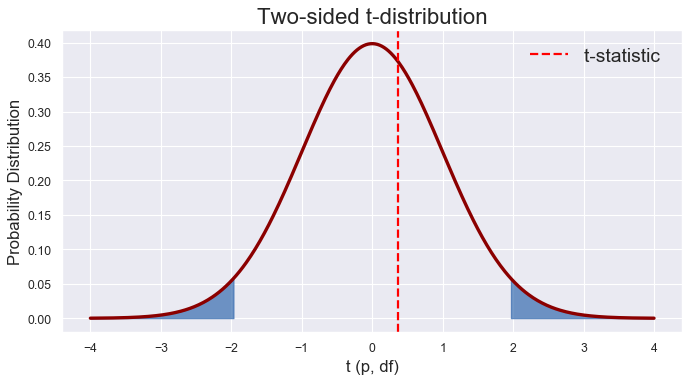

In [15]:
visualization.visualize_t(welch_t, len(CO_ibu), len(CA_ibu))

## Hypothesis 2: IBU of Beers Brewed on West Coast and East Coast
Here we use a function that we created called coast_list() to identify each brewery as East Coast or West Coast. Breweries that are neither are ignored. We then use groupby() to take a quick look at summary statistics.

In [16]:
beer_df_by_coast = test.coast_list(brewery)
beer_df_by_coast.head()

,beer_name,brewery_name,ibu,state,region
21,Lower De Boom,21st Amendment Brewery,92.0,CA,wc
22,Fireside Chat,21st Amendment Brewery,45.0,CA,wc
24,Bitter American,21st Amendment Brewery,42.0,CA,wc
25,Hell or High Watermelon Wheat (2009),21st Amendment Brewery,17.0,CA,wc
26,Hell or High Watermelon Wheat (2009),21st Amendment Brewery,17.0,CA,wc


In [17]:
groupby_coast = beer_df_by_coast.groupby(['region'])
groupby_coast.describe()

ibu                                                     
        count       mean        std  min    25%   50%   75%    max
region                                                            
ec      333.0  42.687688  25.884563  5.0  22.00  35.0  60.0  135.0
wc      428.0  46.665888  26.217038  4.0  23.75  40.0  68.0  138.0

### 2.1. Set Null Hypotheses

The null hypothesis is there is no difference in IBU between beers brewed on the East Coast and beers brewed on the West Coast.

>**$H_{0}$: The mean IBU difference between East Coast beers and West Coast beers is zero. i.e. $H_{0} = H_{1}$**

### 2.2. Set Alternate Hypothesis

>**$H_{1}$ (2-tailed): The mean difference between East Coast and West Coast beers is different.**

### 2.3. Choose the Significance Level
The significance level ($\alpha$) is the probability of rejecting the null hypothesis when it is actually true. The general significance level of 0.05 or 5% risk is used for this hypothesis testing.

### 2.4. Choose A Test
We explore our data to determine which statistical test should be conducted. We examine boxplots for the data and see that both West Coast and East Coast contain at least one outlier.

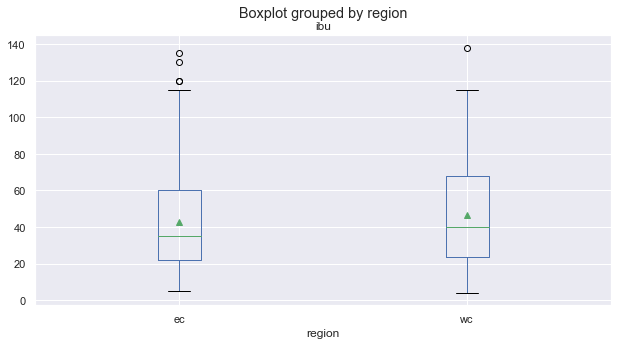

In [18]:
beer_df_by_coast.boxplot(column='ibu',by='region', figsize=(10,5), showmeans=True);

In [19]:
#Remove outliers
beer_clean_df = beer_df_by_coast[beer_df_by_coast.ibu < 120]

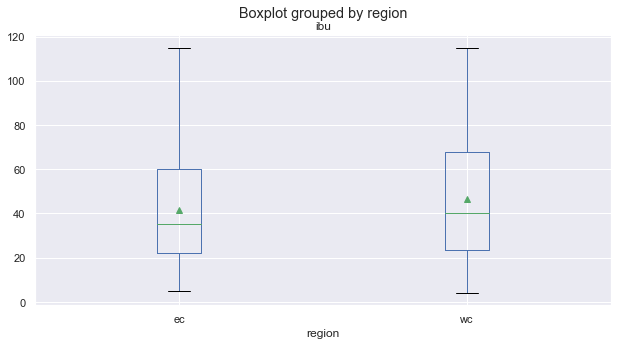

In [20]:
#Confirm that outliers have been removed by calling boxplots
beer_clean_df.boxplot(column='ibu',by='region', figsize=(10,5), showmeans=True);

In [21]:
ec_beers = beer_clean_df.loc[beer_clean_df['region'] == 'ec']
wc_beers = beer_clean_df.loc[beer_clean_df['region'] == 'wc']
wc_ibu = wc_beers['ibu']
ec_ibu = ec_beers['ibu']
wc_mean_ibu = wc_beers['ibu'].mean()
ec_mean_ibu = ec_beers['ibu'].mean()
wc_std_ibu = wc_beers['ibu'].std()
ec_std_ibu = ec_beers['ibu'].std()
wc_count = len(wc_beers)
ec_count = len(ec_beers)

In [22]:
# get the East Coast and West Coast Beers
ec_beers = beer_df_by_coast.loc[beer_df_by_coast['region'] == 'ec']
wc_beers = beer_df_by_coast.loc[beer_df_by_coast['region'] == 'wc']

## explore the mean, variance/standard divation and sample size 
print('\n' +'IBU matrix for East Coast Beers')
print('----------------')
print('East Coast mean:',round(ec_beers['ibu'].mean(),3))
print('East Coast standard deviation:', (ec_beers['ibu'].std()))
print('East Coast size:', len(ec_beers))
print('\n' +'IBU matrix for West Coast Beers')
print('----------------')
print('West Coast mean:', round(wc_beers['ibu'].mean(),3))
print('West Coast standard deviation:', round(wc_beers['ibu'].std(),3))
print('West Coast size:', len(wc_beers))


IBU matrix for East Coast Beers
----------------
East Coast mean: 42.688
East Coast standard deviation: 25.884562985733567
East Coast size: 333

IBU matrix for West Coast Beers
----------------
West Coast mean: 46.666
West Coast standard deviation: 26.217
West Coast size: 428



### 2.5 Calculate the Test Statistic
We know that the variance is equal in these samples.
we can calculate the two-sample t-statistic like so:

$$\large t = \frac{\bar{x}_{1} - \bar{x}_{2}}{\sqrt{s^{2}_{p} (\frac{1}{n_{1}} + \frac{1}{n_{2}}) }    }  $$

Where $s^{2}_{p}$ is the pooled sample variance, calculated as:

$$\large s^{2}_{p}  = \frac{(n_{1} -1)s^{2}_{1} +  (n_{2} -1)s^{2}_{2}}{n_{1} + n_{2} - 2}  $$

Where $s^{2}_{1}$ and $s^{2}_{2}$ are the variances for each sample given by the formula 
$$ \large s^{2} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}{n-1} $$

In [23]:
t_stat = test.twosample_tstatistic(wc_ibu, ec_ibu, alpha=.05)

Null hypohesis rejected. Results are statistically significant with: 
 t-statistic = 2.585 
 critical t-value = 1.9631 and 
p-value = 0.0099 

----- Groups info  -----
The groups contain 427 , and 329 observations. 
    The means are 46.452, and 41.6717 respectivelly


In [24]:
# check the result with scipy package
stats.ttest_ind(wc_ibu, ec_ibu)

Ttest_indResult(statistic=2.584993002110077, pvalue=0.009924792390385118)

### 2.6. Interpret the Result

In this case, we reject the null hypothesis. We see that our t-statistic falls outside of the critical range with a p-value of .0005. Our con

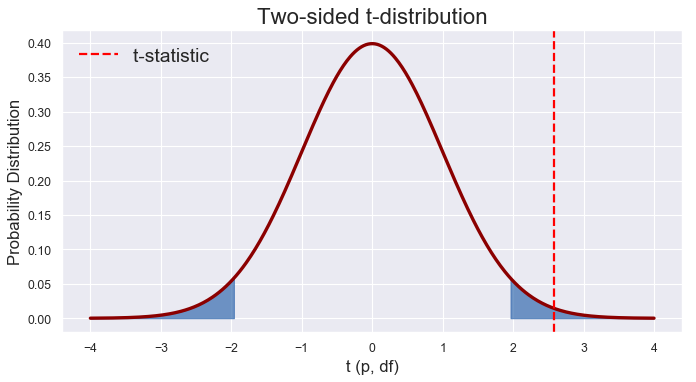

In [25]:
visualization.visualize_t(t_stat, wc_count, ec_count, alpha=.05)

## Welch's t-test
Welch's t-test is the most common hypothesis test used in a two-sample test to infer that two populations have equal means. Welch's test is more reliable when the two samlples have unequal variances and/or unequal sample sizes.

Welch test degrees of freedom and t-statistic is calcualted using the following formaula. 
$$\text{df}  = \frac{\big(\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}\big)^{2}}{\frac{1}{n_{1}-1}\big(\frac{s_{1}^{2}}{n_{1}}\big)^{2} + \frac{1}{n_{2}-1}\big(\frac{s_{2}^{2}}{n_{2}}\big)^{2}}$$
Then T-statistics also known as Welch's t-test is given by: 

$$   t = \frac{(\bar{x}_{1} - \bar{x}_{2}) - D_{0}}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}} = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{se_1^2+se_2^2}}$$

In [26]:
welch_t = test.welch_t(wc_ibu, ec_ibu)
print("Welch's t-statistic is: ", round(welch_t,4))
welch_df = test.welch_df(wc_ibu, ec_ibu)
print("Welch's degrees of fredoom (df):", round(welch_df,4))
# print(f"is is {welch_t} my bad")

# converting this to p_value 
p_welch = test.p_value_welch_ttest(wc_ibu, ec_ibu, two_sided=True)

Welch's t-statistic is:  2.6058
Welch's degrees of fredoom (df): 724.9698
Null hypohesis rejected. Results are statistically significant with:
            t_value = 2.6058, 
            critical t_value = 1.9632, and 
            p-value = 0.0094


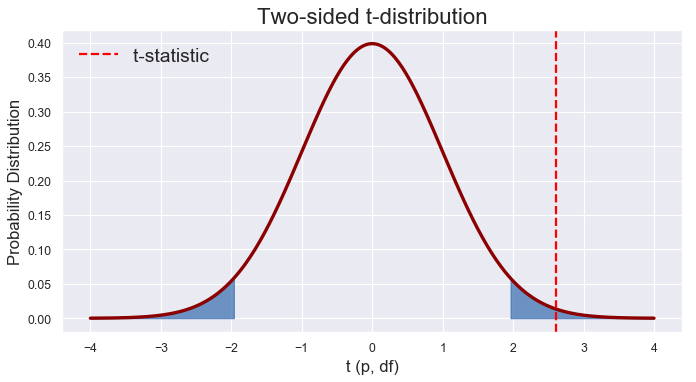

In [27]:
visualization.visualize_t(welch_t, wc_count, ec_count, alpha=.05)

## 2.7. Comparing Two-Sided t-test to Welch's t-test

Having conducted two different tests on the same information, we can compare their p- and t-values.

The two-sided t-test returned: ***t-value =  2.581 and p-value =  0.005***

The Welch t-test returned: ***t-value =  2.606 , and p-value =  0.0047***

We see that the outputs are very similar.

## Hypothesis 3: ANOVA test on IBU between Five Stats 

### 3.1. State Null Hypothesis

The null would be that there will be no difference among the groups mean. Specifically in more statistical language the null for an ANOVA is that the means are the same. We state the Null hypothesis as:

> $H_{0}$: &emsp; $\mu_{1} = \mu_{2} = \mu_{3} = \mu_{4} = \mu_{5} $

### 3.2. State Alternative Hypothesis

> $H_{a}$: &emsp; not all means are equal

### 3.3. Choose the Significance Level
The significance level ($\alpha$) is the probability of rejecting the null hypothesis when it is actually true. The general significance level of 0.05 or 5% risk is used for this hypothesis testing.

### 3.4. Choose A Test
We elect one-way ANOVA to test the null hypothesis that the three groups have the same population mean. The test is applied to samples from the three groups, with differing sizes.

Text(0.5, 1.0, 'Boxplot showing the range of Bitterness')

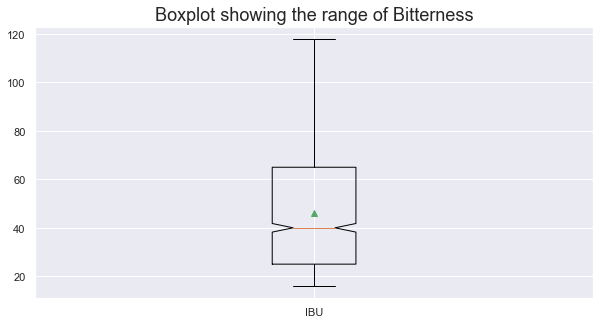

In [28]:
# data cleaning
# removing nans
brewery_cleand  = brewery[~np.isnan(brewery.ibu)]  

# IBU values in 15 to 120 was used. The whole range was  
brewery_cleand = brewery_cleand[brewery_cleand.ibu > 15] 
brewery_cleand = brewery_cleand[brewery_cleand.ibu < 120]

# check box plot 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5)) #, sharey=False)
axs.boxplot(brewery_cleand.ibu, labels=['IBU'], notch=True, showmeans=True)
axs.set_title('Boxplot showing the range of Bitterness', fontsize=18)

In [29]:
WA_ibu = np.array(brewery_cleand[brewery_cleand.state == 'MA']['ibu'])
MN_ibu = np.array(brewery_cleand[brewery_cleand.state == 'MN']['ibu'])
DMV_ibu = np.array(brewery_cleand[brewery_cleand.state.isin(['DC', 'MD', 'VA'])]['ibu'])
TX_ibu = np.array(brewery_cleand[brewery_cleand.state == 'TX']['ibu'])
CO_ibu = np.array(brewery_cleand[brewery_cleand.state == 'CO']['ibu'])

# print some information about our data 
visualization.print_information(WA_ibu, MN_ibu, DMV_ibu, TX_ibu, CO_ibu)

Sample International Bitterness Units (IBU) mean in Washington State: 41.659
Sample International Bitterness Units (IBU) variance in Washington State:  356.41999
Sample size is:  41
---------------------------------
Sample International Bitterness Units (IBU) mean in Minnisota:  49.273
Sample International Bitterness Units (IBU) variance in Minnisota:  543.19835
Sample size is 44
---------------------------------
Sample International Bitterness Units (IBU) mean in DMV:  45.318
Sample International Bitterness Units (IBU) variance in DMV:  594.35331
Sample size is 44
---------------------------------
Sample International Bitterness Units (IBU) mean in TX:  42.602
Sample International Bitterness Units (IBU) variance in TX:  658.69734
Sample size is 83
---------------------------------
Sample International Bitterness Units (IBU) mean in CO:  49.934
Sample International Bitterness Units (IBU) variance in CO:  632.40003
Sample size is 136


### 3.5 Calculate the Test Statistic
The F value in one way ANOVA is a tool to help us answer the question "is the variance between the means of two populations significantly different?" the F value in the ANOVA test also determines the P value; the P value it the probability of getting a result at least as extreme as the one that was actually observed, given that the Null Hypothesis is True. 
The p value is a probability, while the f ratio is a test statistic, calculated as: <br>

$$\large F_{value} = \frac{variance of the group means (Mean Square Between)}{mean of the within group variances (Mean Squared Error)}$$

In [30]:
## apply directly scipy.stats's f_oneway method 
import scipy.stats as stats
n1, n2, n3, n4, n5 = len(WA_ibu), len(MN_ibu), len(DMV_ibu), len(TX_ibu), len(CO_ibu)
k = len([WA_ibu, MN_ibu, DMV_ibu, TX_ibu, CO_ibu]) # number of population groups

# use scipy to calcualte the f and p 
f_anova, p_value = stats.f_oneway(WA_ibu, MN_ibu, DMV_ibu, TX_ibu, CO_ibu)
print('f-statistic is:', f_anova)
print('The probability is:', p_value)

f-statistic is: 1.7641513584180186
The probability is: 0.13560853011291701


Null hypothesis is True with: 
        f-statistic = 1.7642,
        critical f-value = 2.398, and 
        p-value = 0.1356
>> We fail to reject the Null Hypohesis


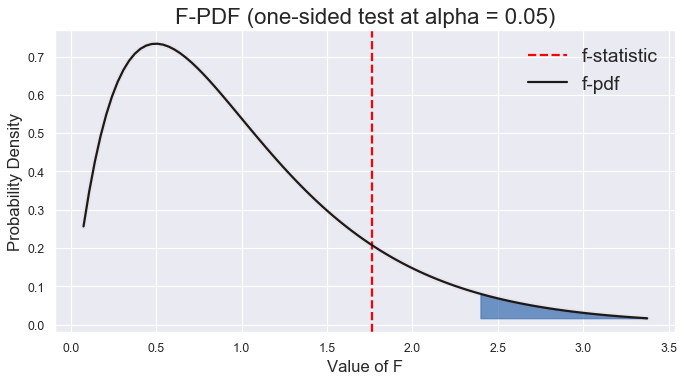

In [31]:
# ## visualize it
# import visualization as vis

# calucate denominator and nominator degrees of freedom
dfn = k - 1 # nominator degrees of freedom 
dfd = n1 + n2 + n3 + n4 + n5 - k # denominator degrees of freedom

visualization.f_distribution(dfn, dfd, f_anova, p_value, alpha=0.05) 